# google playstore data
#### complete EDA analysis for beginners to advance EDA 

Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.

Content
Each app (row) has values for catergory, rating, size, and more.

Acknowledgements
This information is scraped from the Google Play Store. This app information would not be available without it.

Inspiration
The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market!




step #1 import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

step #2 data loading and exploration and cleaning

In [4]:
# lets load the csv file

df =pd.read_csv('D:\pandas_tips_tricks\data\googleplaystore.csv')

lets have look on top 5 rows  of the data

In [73]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# important things to know

In [74]:
# set options to be maximum for rows and columns

pd.set_option('display.max_columns',None)


pd.set_option('display.max_rows',None)

# hide all warnings
import warnings
warnings.filterwarnings('ignore')

In [75]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [76]:
print(f" The names of columns in this dataset  are as follows:{df.columns}")

 The names of columns in this dataset  are as follows:Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [77]:
df.shape

(10841, 13)

In [78]:
print(f"The Number of Rows are{df.shape[0]},and columns are {df.shape[1]}")

The Number of Rows are10841,and columns are 13


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [80]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [81]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# how to make size a numeric column 

In [82]:
df['Size'].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
16M                    149
26M                    149
25M                    143
20M                    139
21M                    138
24M                    136
10M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
3.4M                    65
2.8M                    65
3.7M                    63
32M                     63
34M                     63
3.9M                    62
40M                    

# observations
1.varies with device.
2  . M
3  .k

In [83]:
df['Size'].isnull().sum()

np.int64(0)

- no missing values exist in size column we are good to go

In [84]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

 - verify the number of values and 3 different kinds of values

In [85]:
# find the values having M in them 
df['Size'].loc[df['Size'].str.contains('M')].value_counts().sum()

np.int64(8829)

In [86]:
#  find the values having k in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()

np.int64(316)

In [87]:
# find the values varies with device
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()

np.int64(1695)

In [88]:
8829 +316 +1695

10840

In [89]:
len(df)

10841

In [90]:
# convert the whole size  columns into bytes
#  lets define the function

def convert_size(size):
    if isinstance(size, str):
        if 'k' in size :
              return float(size.replace('k',"")) *1024
        elif 'M' in size:
            return float(size.replace('M',"")) *1024 * 1024
        elif 'Varies with device' in size :
            return np.nan
        return size
      



In [91]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
5                      5.6M
6                       19M
7                       29M
8                       33M
9                      3.1M
10                      28M
11                      12M
12                      20M
13                      21M
14                      37M
15                     2.7M
16                     5.5M
17                      17M
18                      39M
19                      31M
20                      14M
21                      12M
22                     4.2M
23                     7.0M
24                      23M
25                     6.0M
26                      25M
27                     6.1M
28                     4.6M
29                     4.2M
30                     9.2M
31                     5.2M
32                      11M
33                      11M
34                     4.2M
35                  

In [92]:
# lets apply this function
df['Size'] = df['Size'].apply(convert_size)

In [7]:
df['Size']

0                       19M
1                       14M
2                      8.7M
3                       25M
4                      2.8M
                ...        
10836                   53M
10837                  3.6M
10838                  9.5M
10839    Varies with device
10840                   19M
Name: Size, Length: 10841, dtype: object

In [8]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
#  rename the column 
df.rename(columns= {'Size':"Size_in_bytes"}, inplace=True)

In [10]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [102]:
df['Size_in_Mb'] = df['Size_in_bytes'].apply(
    lambda x: x/(1024*1024) if isinstance(x, (int, float)) and not pd.isnull(x) else np.nan
)

In [105]:
df['Size_in_kb'] = df['Size_in_bytes'].apply(
    lambda x: x/(1024*1024) if isinstance(x, (int, float)) and not pd.isnull(x) else np.nan
)

In [11]:
df['Size_in_Mb'] = df['Size_in_bytes'].apply(lambda x: x/(1024*1024) if isinstance(x, (int, float)) and not pd.isnull(x) else np.nan)

In [106]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2.8


# lets take care of installs

In [107]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [108]:
df['Installs'].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             907
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Free                 1
Name: count, dtype: int64

In [109]:
df['Installs'].isnull().sum()

np.int64(0)

# install column
1- remove + sign
2-  remove ,
3- convert the column into an integer

In [110]:
df['Installs'] = df['Installs'].apply (lambda x:x.replace('+',"") if isinstance(x,str) else x) 

In [111]:
df.head()

,App,Category,Rating,Reviews,Size_in_bytes,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Size_in_Mb,Size_in_kb
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,19.0,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,14.0,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,8.7,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,25.0,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,2.8,2.8


In [112]:
df['Installs'].value_counts()

Installs
1,000,000        1579
10,000,000       1252
100,000          1169
10,000           1054
1,000             907
5,000,000         752
100               719
500,000           539
50,000            479
5,000             477
100,000,000       409
10                386
500               330
50,000,000        289
50                205
5                  82
500,000,000        72
1                  67
1,000,000,000      58
0                  15
Free                1
Name: count, dtype: int64

In [113]:
df['Installs'] = df['Installs'].apply (lambda x:x.replace(',',"") if isinstance(x,str) else x) 

In [114]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: count, dtype: int64

In [12]:
df['Installs'] = df['Installs'].apply(lambda x: int(x)if isinstance(x,str) else x) 

ValueError: invalid literal for int() with base 10: '10,000+'

In [13]:
df['Installs'] = df['Installs'].apply(lambda x: int(x) if isinstance(x, str) and x.isdigit() else (int(x) if isinstance(x, str) and x.replace('.', '', 1).isdigit() else (np.nan if x == '' else x)))

In [116]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: count, dtype: int64

In [117]:
df.describe()

,Rating,Size_in_Mb,Size_in_kb
count,9367.000000,9145.000000,9145.000000
mean,4.193338,21.516165,21.516165
std,0.537431,22.589084,22.589084
min,1.000000,0.008301,0.008301
25%,4.000000,4.900000,4.900000
50%,4.300000,13.000000,13.000000
75%,4.500000,30.000000,30.000000
max,19.000000,100.000000,100.000000


 # price column

In [118]:
df['Price'].value_counts()

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$3.49           7
$29.99          7
$7.99           7
$24.99          7
$5.49           6
$19.99          6
$12.99          5
$6.49           5
$8.99           5
$11.99          5
$2.00           3
$10.00          3
$16.99          3
$1.00           3
$7.49           2
$17.99          2
$8.49           2
$10.99          2
$79.99          2
$9.00           2
$39.99          2
$1.70           2
$3.95           2
$13.99          2
$33.99          2
$15.99          1
$1.50           1
$400.00         1
$74.99          1
$25.99          1
$3.88           1
$4.84           1
$1.76           1
$3.02           1
$4.77           1
$1.59           1
$2.50           1
$1.29           1
$1.61           1
$5.00           1
$299.99         1
$37.

In [127]:
# let see how many values $ sign
df['Price'].loc[df['Price'].str.contains('$')].value_counts().sum()

np.int64(10841)

In [126]:
df['Price'].loc[df['Price'].str.contains('\$')].value_counts().sum()

np.int64(800)

In [130]:
df['Price'].loc[df['Price'].str.contains('0')].value_counts() &  df['Price'].loc[df['Price'].str.contains('$')].value_counts()

Price
0            True
0.99         True
1.00         True
1.04         True
1.20         True
1.26        False
1.29        False
1.49        False
1.50         True
1.59        False
1.61        False
1.70         True
1.75        False
1.76        False
1.96        False
1.97        False
1.99        False
10.00        True
10.99        True
109.99       True
11.99       False
12.99       False
13.99       False
14.00        True
14.99       False
15.46       False
15.99       False
154.99      False
16.99       False
17.99       False
18.99       False
19.40        True
19.90        True
19.99       False
2.00         True
2.49        False
2.50         True
2.56        False
2.59        False
2.60         True
2.90         True
2.95        False
2.99        False
200.00       True
24.99       False
25.99       False
28.99       False
29.99       False
299.99      False
3.02         True
3.04         True
3.08         True
3.28        False
3.49        False
3.61        False
3.88

In [129]:
df['Price'] = df['Price'].apply (lambda x:x.replace('$',"") if isinstance(x,str) else x) 

In [132]:
df['Price'].value_counts()

Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
3.49            7
29.99           7
7.99            7
24.99           7
5.49            6
19.99           6
12.99           5
6.49            5
8.99            5
11.99           5
2.00            3
10.00           3
16.99           3
1.00            3
7.49            2
17.99           2
8.49            2
10.99           2
79.99           2
9.00            2
39.99           2
1.70            2
3.95            2
13.99           2
33.99           2
15.99           1
1.50            1
400.00          1
74.99           1
25.99           1
3.88            1
4.84            1
1.76            1
3.02            1
4.77            1
1.59            1
2.50            1
1.29            1
1.61            1
5.00            1
299.99          1
37.9

In [136]:
 # now we can convert into numeric values
 df['Price'] = df['Price'].apply(lambda x: float(x) if isinstance(x, str) and x.replace('.', '', 1).isdigit() else (np.nan if x == '' else x))

In [138]:
df['Price'].value_counts()

Price
0.0         10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
3.49            7
29.99           7
7.99            7
24.99           7
5.49            6
19.99           6
12.99           5
6.49            5
8.99            5
11.99           5
2.0             3
10.0            3
16.99           3
1.0             3
7.49            2
17.99           2
8.49            2
10.99           2
79.99           2
9.0             2
39.99           2
1.7             2
3.95            2
13.99           2
33.99           2
15.99           1
1.5             1
400.0           1
74.99           1
25.99           1
3.88            1
4.84            1
1.76            1
3.02            1
4.77            1
1.59            1
2.5             1
1.29            1
1.61            1
5.0             1
299.99          1
37.9

In [139]:
df.describe()

,Rating,Size_in_Mb,Size_in_kb
count,9367.000000,9145.000000,9145.000000
mean,4.193338,21.516165,21.516165
std,0.537431,22.589084,22.589084
min,1.000000,0.008301,0.008301
25%,4.000000,4.900000,4.900000
50%,4.300000,13.000000,13.000000
75%,4.500000,30.000000,30.000000
max,19.000000,100.000000,100.000000


In [142]:
df['Price'] = df['Price'].apply(
    lambda x: x/(1024*1024) if isinstance(x, ( float)) and not pd.isnull(x) else np.nan
)

In [143]:
df.describe()

,Rating,Price,Size_in_Mb,Size_in_kb
count,9367.000000,1.084000e+04,9145.000000,9145.000000
mean,4.193338,9.343858e-13,21.516165,21.516165
std,0.537431,1.450617e-11,22.589084,22.589084
min,1.000000,0.000000e+00,0.008301,0.008301
25%,4.000000,0.000000e+00,4.900000,4.900000
50%,4.300000,0.000000e+00,13.000000,13.000000
75%,4.500000,0.000000e+00,30.000000,30.000000
max,19.000000,3.637979e-10,100.000000,100.000000


In [ ]:
# using f string min,max and average prices of app
print(f"Min price is {df['Price'].min()}")



Min price is $0.99


Missing values 

In [14]:
# find missing values
df.isnull().sum().sort_values(ascending=False)

Size_in_Mb        10841
Rating             1474
Current Ver           8
Android Ver           3
Type                  1
Content Rating        1
Installs              0
Size_in_bytes         0
Reviews               0
Category              0
App                   0
Price                 0
Genres                0
Last Updated          0
dtype: int64

In [18]:
# find missing value percentage in the data
df.isnull().sum()/len(df) *100





App                 0.000000
Category            0.000000
Rating             13.596532
Reviews             0.000000
Size_in_bytes       0.000000
Installs            0.000000
Type                0.009224
Price               0.000000
Content Rating      0.009224
Genres              0.000000
Last Updated        0.000000
Current Ver         0.073794
Android Ver         0.027673
Size_in_Mb        100.000000
dtype: float64

In [16]:
# find total number of missing values
df.isnull().sum().sum()

np.int64(12328)

<Axes: >

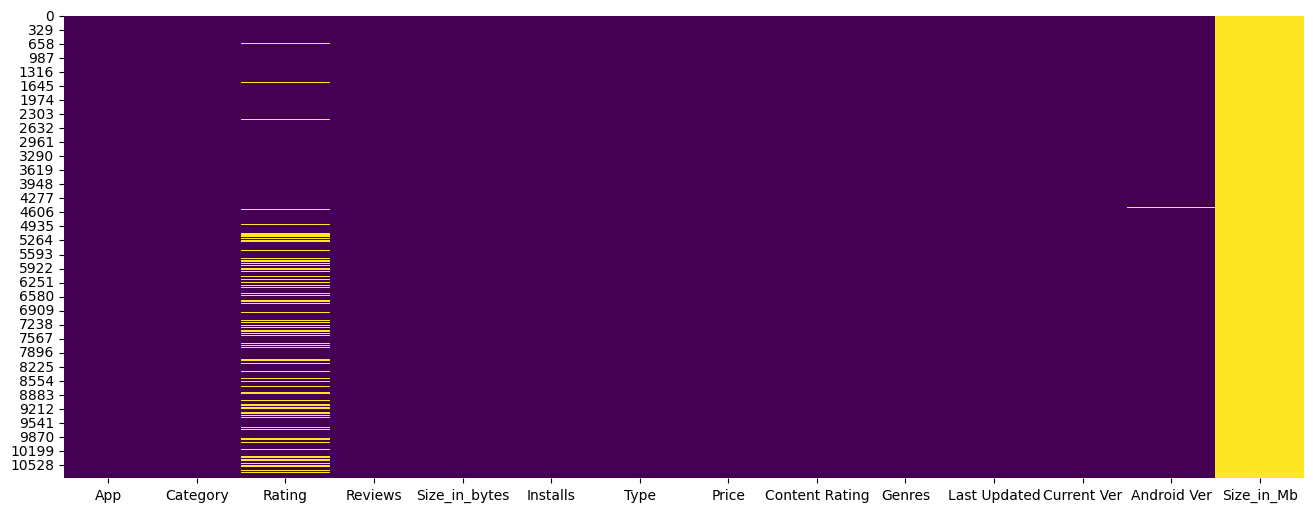

In [17]:
# plot missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')


<Axes: >

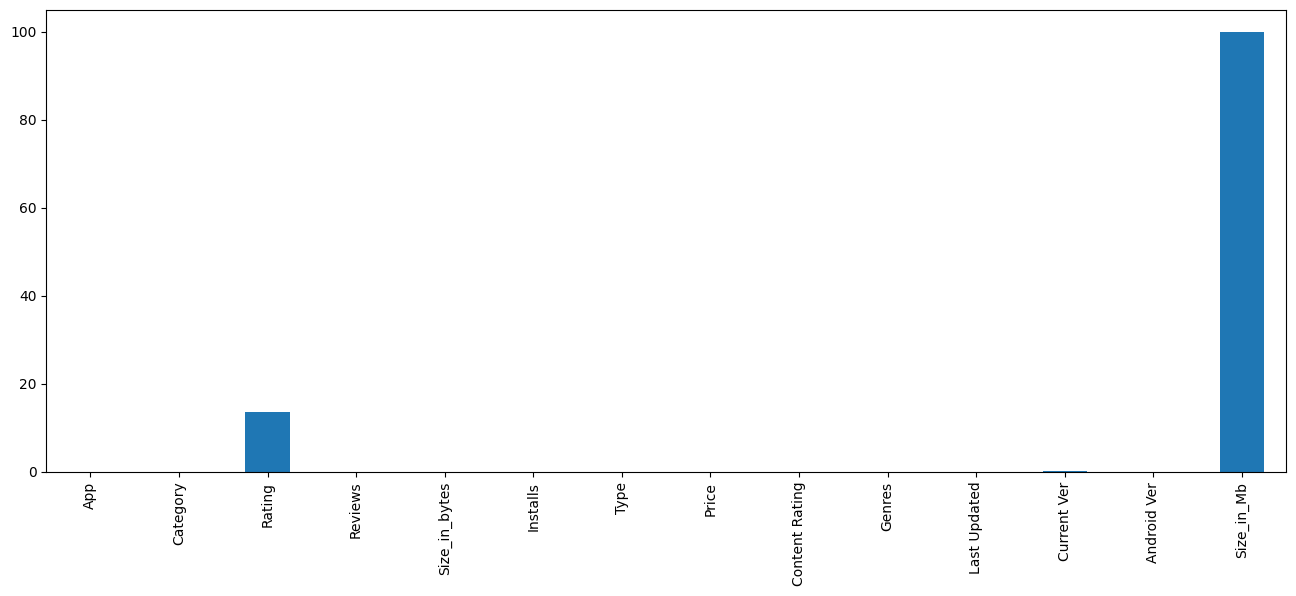

In [20]:
# plot the null values by their percentage in each column
missing_percentage = df.isnull().sum()/len(df)* 100
missing_percentage.plot(kind='bar',figsize=(16,6))

<Axes: >

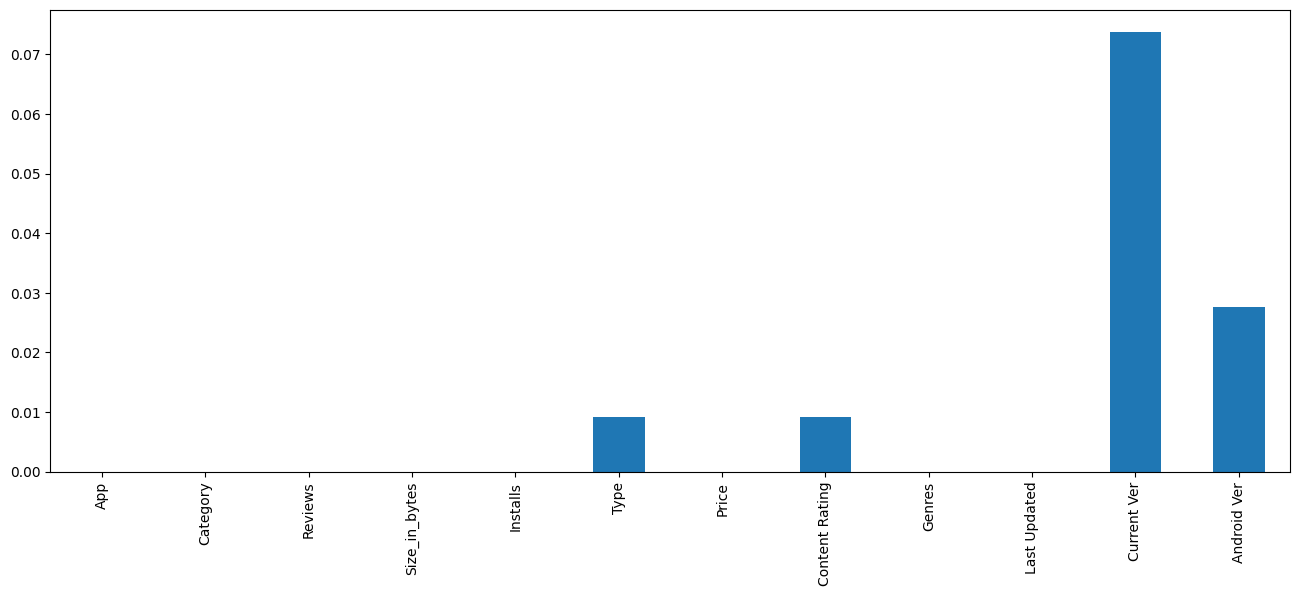

In [21]:
missing_percentage[missing_percentage<1].plot(kind='bar',figsize=(16,6))